In [3]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [10]:
path_to_dir = '/scratch/local1/hzg2'
files_in_dir = os.listdir(path_to_dir)
# filter for files that end on .nc
files_nc = [i for i in files_in_dir if i.endswith('.nc')]
# sort in such a way that schout_1.nc, schout_2.nc, ... schout_10.nc, schout_11.nc, ... (and not schout_1.nc, schout_10.nc, schout_100.nc, ...)
files_nc.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

In [11]:
df = Dataset(os.path.join(path_to_dir, files_nc[160]), 'r')

In [14]:
_ = [print(i) for i in df.variables.keys()]

time
SCHISM_hgrid
SCHISM_hgrid_face_nodes
SCHISM_hgrid_edge_nodes
SCHISM_hgrid_node_x
SCHISM_hgrid_node_y
node_bottom_index
SCHISM_hgrid_face_x
SCHISM_hgrid_face_y
ele_bottom_index
SCHISM_hgrid_edge_x
SCHISM_hgrid_edge_y
edge_bottom_index
depth
sigma
dry_value_flag
coordinate_system_flag
minimum_depth
sigma_h_c
sigma_theta_b
sigma_theta_f
sigma_maxdepth
Cs
wetdry_elem
zcor
elev
bottom_stress
vertical_velocity
temp
salt
diffusivity
TKE
hvel
ECO_no3
ECO_nh4
ECO_pho
ECO_sil
ECO_oxy
ECO_fla
ECO_dia
ECO_bg
ECO_bgchl
ECO_diachl
ECO_flachl
ECO_microzoo
ECO_mesozoo
ECO_det
ECO_opa
ECO_dom
ECO_sed1
ECO_sed2
ECO_sed3
spm_sum_of_all_classes
spm_very_fine_silt
spm_fine_silt
spm_medium_silt
spm_coarse_silt
spm_very_fine_sand


In [48]:
x = df.variables['SCHISM_hgrid_node_x'][:]
y = df.variables['SCHISM_hgrid_node_y'][:]
tri = df.variables['SCHISM_hgrid_face_nodes'][:,:3] - 1

O2 = df.variables['ECO_oxy']
# average over time (axis=0)
O2 = np.mean(O2, axis=0)
# values over 1000 to nan
O2[O2 > 1000] = np.nan



In [38]:
x.shape

(32432,)

In [36]:
O2.shape

(32432, 21)

In [33]:
tri.shape

(60213, 3)

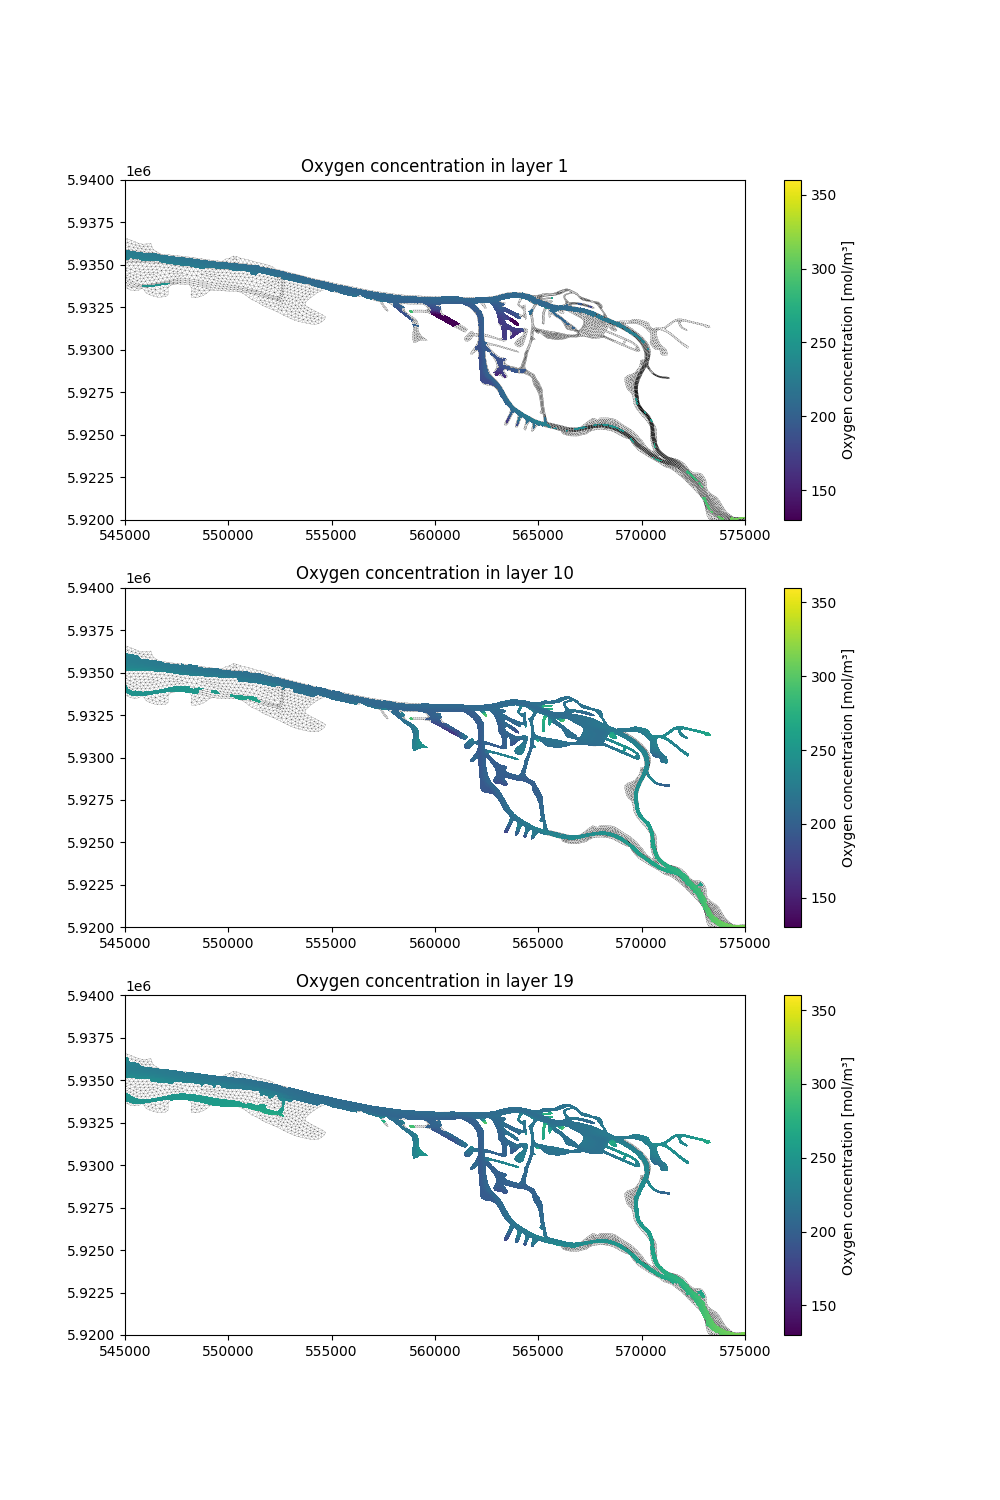

In [57]:
%matplotlib widget

vlim = [0, 300]

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
for i, layer in enumerate([1, 10, 19]):

    ax[i].triplot(x, y, tri, color='black', linewidth=0.1)
    ax[i].tripcolor(x, y, tri, O2[:,layer-1], shading='flat', vmin=130, vmax=360)
    ax[i].set_title(f'Oxygen concentration in layer {layer}')
    # add colorbar with label "Oxygen concentration [mol/m³]"
    cbar = plt.colorbar(ax[i].collections[0], ax=ax[i], orientation='vertical', label='Oxygen concentration [mol/m³]')

    ax[i].set_xlim([545000, 575000])
    ax[i].set_ylim([5920000, 5940000])

    
    
    